# Modes of Variability

This notebook provides an overview of running the modes of variability module of PCMDI Metrics Package (PMP). 

---

Table of Contents
- [1. Environment](#env)
- [2. Usage](#usage)
- [3. Example](#example)
  * [3.1 **Atmospheric mode: NAM**](#NAM)
    - 3.1.1 Run metrics
    - 3.1.2 Customize Observation Settings
    - 3.1.3 Customize Model Settings
    - 3.1.4 Results
  * [3.2 **SST-based mode: PDO**](#PDO)
    - 3.2.1 Run Metircs
    - 3.2.2 Results
  * [3.3 **SST-based mode: AMO**](#AMO)
    - 3.3.1 Run Metircs
    - 3.3.2 Results
    - 3.3.3 AMO (yearly)

---

Reference papers for PMP's modes of variability metrics:
- Lee, J., K. Sperber, P. Gleckler, C. Bonfils, and K. Taylor, 2019: Quantifying the Agreement Between Observed and Simulated Extratropical Modes of Interannual Variability. Climate Dynamics, 52, 4057-4089, https://doi.org/10.1007/s00382-018-4355-4
- Lee, J., K. Sperber, P. Gleckler, K. Taylor, and C. Bonfils, 2021: Benchmarking performance changes in the simulation of extratropical modes of variability across CMIP generations. Journal of Climate, 34, 6945–6969, https://doi.org/10.1175/JCLI-D-20-0832.1

More information can be found in the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/variability_mode). Additional example parameter files are archived in the [PMP sample setups](https://github.com/PCMDI/pcmdi_metrics/tree/master/sample_setups/pcmdi_parameter_files/variability_modes). 

---

It is expected that the user has run the [Demo_0_download_data notebook](Demo_0_download_data.ipynb) to obtain the sample data and generate parameter files. This first cell loads the demo directory choices made in Demo_0_download_data.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

In [3]:
# For quick output check in this notebook
import xcdat as xc
import xarray as xr
import datetime
import matplotlib.pyplot as plt

# 1. Environment <a class="anchor" id="env"></a>

The modes of variability metric requires following two packages installed in your environment: [eofs](https://ajdawson.github.io/eofs/latest/) and [scipy](https://www.scipy.org/). They are part of the standard PMP installation, so should have been installed when you were installing the PMP. However in case somehow if they were not installed in your environment, you can edit the following cell to install them in your environment from this jupyter notebook kernel. Delete the triple quotations from lines 2&5 to install with conda:

In [4]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [5]:
# for pip
"""
import sys
!{sys.executable} -m pip install eofs scipy
"""

'\nimport sys\n!{sys.executable} -m pip install eofs scipy\n'

# 2. Usage <a class="anchor" id="usage"></a>

Modes of variability can be run on the command line or with using a parameter file

Available modes: NAM, NAO, SAM, PNA, PDO, NPO, NPGO, AMO  
Available seasons: DJF, MAM, JJA, SON, monthly, yearly  
ConvEOF = True  # Calculate conventioanl EOF for model  
CBF = True  # Calculate Common Basis Function (CBF) for model  

For help, type:  
```
variability_modes_driver.py --help
```

In [6]:
%%bash
variability_modes_driver.py --help

usage: variability_modes_driver.py [-h] [--parameters PARAMETERS]
                                   [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                   [--results_dir RESULTS_DIR]
                                   [--reference_data_path REFERENCE_DATA_PATH]
                                   [--modpath MODPATH] [--mip MIP] [--exp EXP]
                                   [--frequency FREQUENCY] [--realm REALM]
                                   [--reference_data_name REFERENCE_DATA_NAME]
                                   [-v VARIABILITY_MODE]
                                   [--seasons SEASONS [SEASONS ...]]
                                   [--modnames MODNAMES [MODNAMES ...]]
                                   [-r REALIZATION] [--modpath_lf MODPATH_LF]
                                   [--varOBS VAROBS] [--varModel VARMODEL]
                                   [--eofn_obs EOFN_OBS] [--eofn_mod EOFN_MOD]
                                   [--osyear

# 3. Example <a class="anchor" id="example"></a>

## 3.1 Atmospheric mode: NAM <a class="anchor" id="NAM"></a>

### 3.1.1 Run metrics

This example uses settings from the "basic_mov_param.py" parameter file to run the metrics for the NAM (Northern Annular Mode) in DJF. The input data for this mode of variability is monthly sea level pressure. 

In [7]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_1"

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_1
demo_output/mov_1
demo_output/mov_1
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


INFO::2023-11-29 17:34::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2023-11-29 17:34:42,500 [INFO]: base.py(write:250) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


### 3.1.2 Customize Observation Settings

Options given in the `basic_mov_param.py` file can be overriden by options given from the command line.

For example, below is for settings for observations from `basic_mov_param.py`:
```python
varOBS = 'psl'  
ObsUnitsAdjust = (True, 'divide', 100.0)  # Pa to hPa; or (False, 0, 0)  

osyear = 1900  
oeyear = 2005  
eofn_obs = 1  
```

If you want to adjust observation starting year (`osyear`) to 1980 and assign new `case_id` as "mov_2":

In [8]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_2" --osyear 1980

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_2
demo_output/mov_2
demo_output/mov_2
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


INFO::2023-11-29 17:35::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_2/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2023-11-29 17:35:19,800 [INFO]: base.py(write:250) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_2/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


### 3.1.3 Customize Model Settings

Similarly, options for models can be also adjusted from command line.

In [9]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_3" --msyear 1950 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/mov_3
demo_output/mov_3
demo_output/mov_3
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


INFO::2023-11-29 17:35::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_3/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1950-2005.json
2023-11-29 17:35:59,804 [INFO]: base.py(write:250) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/mov_3/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1950-2005.json


### 3.1.4 Results

Results are generated in three different types: maps in image (PNG), maps and time series in binary (netCDF), and metrics in text (JSON).

By the default setting, metrics code generates outputs for CBF (Common Basis Function), EOF1, EOF2, and EOF3. 

### Graphic images (PNG)

Graphics are saved in along with other results in a folder with the case_id name. Here we list the images available from the Basic Example and display the CBF plot.

In [10]:
!ls {demo_output_directory + "/mov_1/*.png"}

demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_teleconnection.png
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.png
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png


In [11]:
image_path1 = demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.png"
image_path2 = demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png"

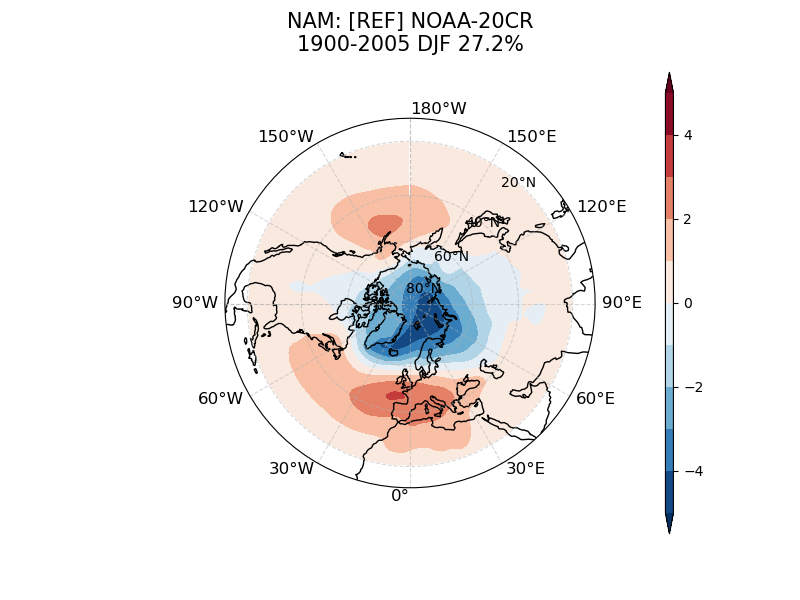

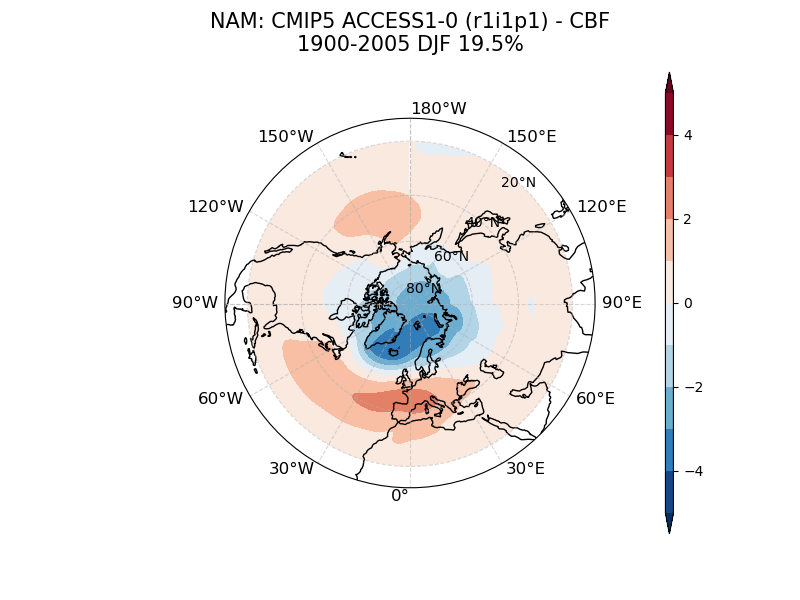

In [12]:
a = Image(image_path1)
b = Image(image_path2)
display_png(a, b)

**Above figure:** Simulated NAM obtained from the reference dataset (NOAA-20CR) [top] and ACCESS1-0 model using the Common Basis Function (CBF) approach [bottom]. Percent of variance (%) explained by the simulated mode is noted at the top.

###  Binary (NetCDF)

NetCDF files include spatial patterns for aforementioned maps and associated PC timeseries. The ncdump utility is used to get a summary of the netCDF results from the Basic Example.

In [13]:
!ls {demo_output_directory + "/mov_1/*.nc"}

demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc
demo_output/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc


In [14]:
!ncdump -h {demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"}

netcdf NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf {
dimensions:
	time = UNLIMITED ; // (105 currently)
	bound = 2 ;
	lat = 145 ;
	lon = 192 ;
variables:
	double time(time) ;
		time:bounds = "bounds_time" ;
		time:axis = "T" ;
		time:calendar = "proleptic_gregorian" ;
		time:units = "days since 0001-01-01" ;
		time:realtopology = "linear" ;
	double bounds_time(time, bound) ;
	double pc(time) ;
		pc:long_name = "variable_18940_pseudo_pcs" ;
		pc:missing_value = 1.e+20 ;
		pc:_FillValue = 1.e+20 ;
	double lat(lat) ;
		lat:bounds = "lat_bnds" ;
		lat:axis = "Y" ;
		lat:units = "degrees_north" ;
		lat:long_name = "latitude" ;
		lat:standard_name = "latitude" ;
		lat:realtopology = "linear" ;
	double lat_bnds(lat, bound) ;
	double lon(lon) ;
		lon:bounds = "lon_bnds" ;
		lon:axis = "X" ;
		lon:modulo = 360. ;
		lon:topology = "circular" ;
		lon:units = "degrees_east" ;
		lon:long_name = "longitude" ;
		lon:standard_name = "longitude" ;
		lon:realtopology = "circu

### Metrics (JSON)

Finally, we list the JSON metrics files from the Basic Example and look inside one of these JSONS.

In [15]:
!ls {demo_output_directory + "/mov_1/*.json"}

demo_output/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


In [16]:
import json
with open(demo_output_directory+"/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json") as fj:
    metrics = json.load(fj)["RESULTS"]
print(json.dumps(metrics, indent=2))

{
  "ACCESS1-0": {
    "r1i1p1": {
      "defaultReference": {
        "NAM": {
          "DJF": {
            "best_matching_model_eofs__cor": 1,
            "best_matching_model_eofs__rms": 1,
            "best_matching_model_eofs__tcor_cbf_vs_eof_pc": 1,
            "cbf": {
              "bias": -0.00019562846900530282,
              "bias_glo": -0.04295804178762172,
              "cor": 0.9710135582327004,
              "cor_glo": 0.9569263431175612,
              "frac": 0.1953762838745173,
              "frac_cbf_regrid": 0.1965854221826735,
              "mean": 0.0,
              "mean_glo": 0.07534158696354636,
              "rms": 0.46501370637642203,
              "rms_glo": 0.2984561498091531,
              "rmsc": 0.24077558921304587,
              "rmsc_glo": 0.2935086200447462,
              "stdv_pc": 1.1646807200025886,
              "stdv_pc_ratio_to_obs": 0.7608321251796002
            },
            "eof1": {
              "bias": -0.00023302144704989206,
         

In [17]:
JSON(
    demo_output_directory+"/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json",
)

<IPython.core.display.JSON object>

## 3.2 SST-based mode: PDO <a class="anchor" id="PDO"></a>
### 3.2.1 Run Metircs

In [18]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --case_id "PDO" --msyear 1900 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: PDO
seasons: ['monthly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/PDO
demo_output/PDO
demo_output/PDO
Estimate landmask
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
INFO::2023-11-29 17:38::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/PDO/var_mode_PDO_EOF1_stat_cmip5_historical_

### 3.2.2 Results

In [19]:
image_path1 = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_obs_1900-2005.png"
image_path2 = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png"
image_path3 = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png"

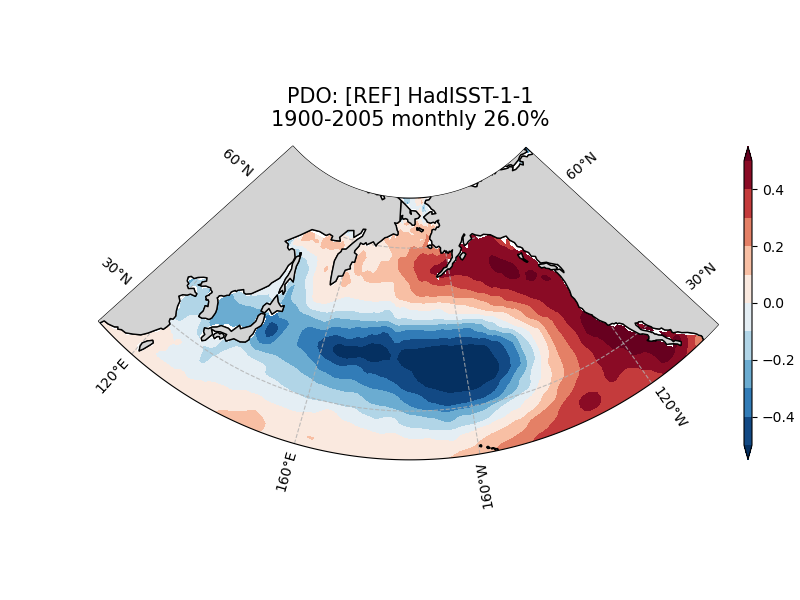

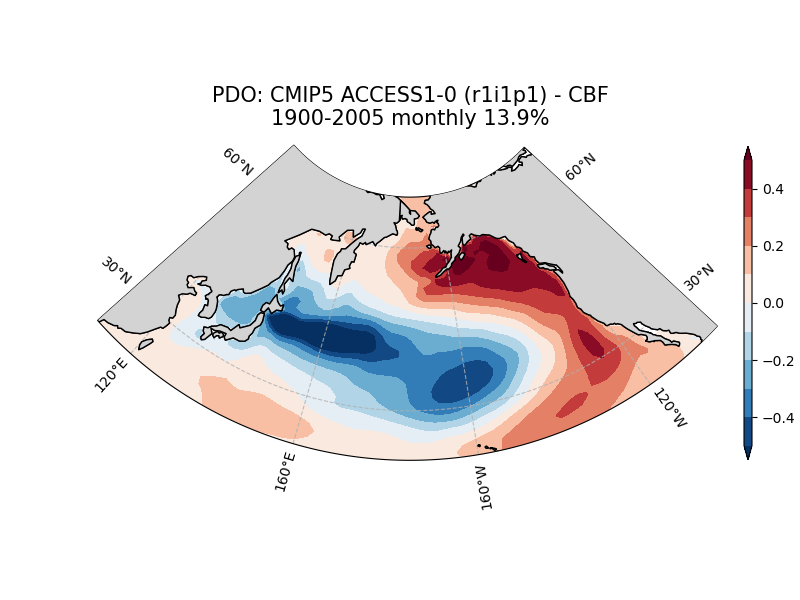

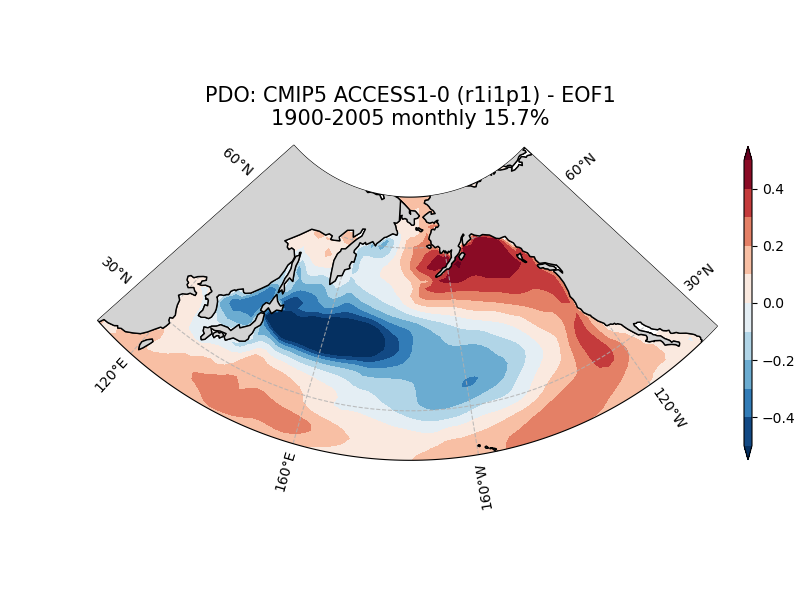

In [20]:
a = Image(image_path1)
b = Image(image_path2)
c = Image(image_path3)

display_png(a, b, c)

**Above figure:** PDO pattern obtained from the reference dataset (HadISST-1-1) [top], ACCESS1-0 model using the CBF [middle] and traditional EOF approach [bottom]. Percent of variance (%) explained by the simulated mode is noted at the top.

### Quick analysis: Comparison between CBF and traditional EOF approaches

In [21]:
ncfilename = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"

In [22]:
ncfilename2 = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc"

In [23]:
ds1 = xc.open_dataset(ncfilename)
ds2 = xc.open_dataset(ncfilename2)

In [24]:
ds1

<xarray.Dataset>
Dimensions:      (time: 1272, bound: 2, lat: 145, lon: 192)
Coordinates:
  * lat          (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon          (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time         (time) object 1900-01-16 12:00:00 ... 2005-12-16 12:00:00
Dimensions without coordinates: bound
Data variables:
    bounds_time  (time, bound) object ...
    pc           (time) float64 ...
    lat_bnds     (lat, bound) float64 ...
    lon_bnds     (lon, bound) float64 ...
    eof          (lat, lon) float64 ...
    slope        (lat, lon) float64 ...
    intercept    (lat, lon) float64 ...
    frac         float64 ...
Attributes:
    Conventions:  CF-1.0

In [25]:
date = [datetime.datetime(d.year, d.month, d.day) for d in ds1.time.values]

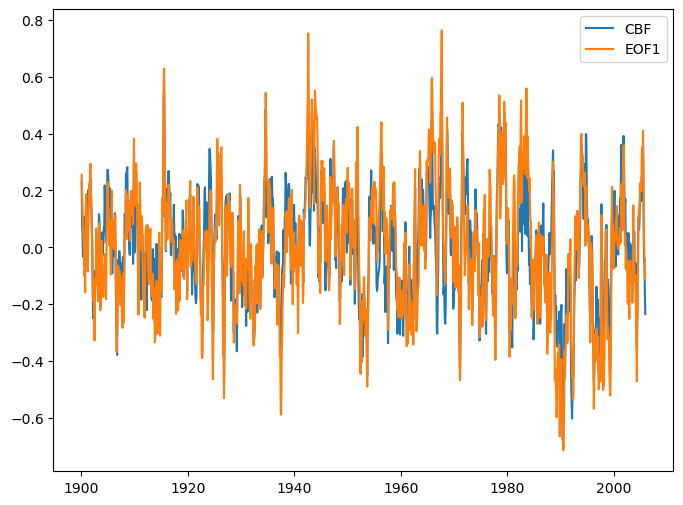

In [26]:
fig = plt.figure(figsize=(8, 6))

plt.plot(date, ds1['pc'], label='CBF')
plt.plot(date, ds2['pc'], label='EOF1')
plt.legend()

#### Temporal correlation between the two time series

In [27]:
float(xr.corr(ds1['pc'], ds2['pc']))

0.8768126176637406

### Quick check for the binary output

#### Output fields from Reference data and model

In [28]:
ds_obs = xc.open_dataset(demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_obs_1900-2005.nc")
ds_model = xc.open_dataset(demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc")

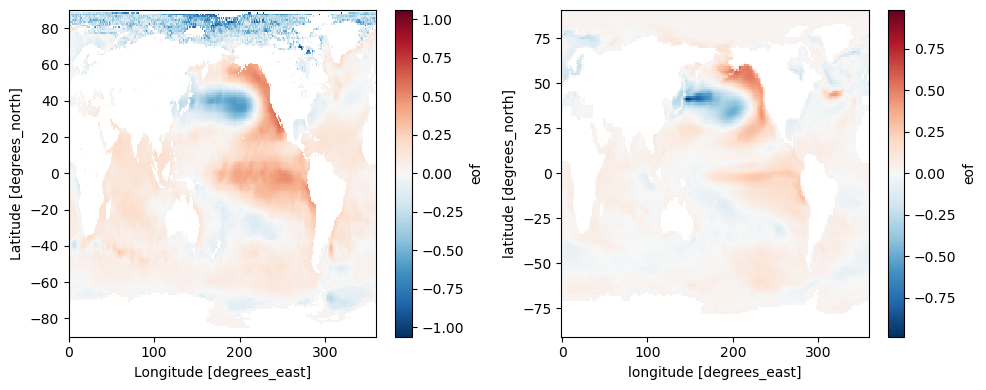

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ds_obs['eof'].plot(ax=ax1)
ds_model['eof'].plot(ax=ax2)

fig.tight_layout()

## 3.3 SST-based mode: AMO <a class="anchor" id="AMO"></a>
### 3.3.1 Run Metircs

In [30]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --variability_mode "AMO" --case_id "AMO" --msyear 1900 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: AMO
seasons: ['monthly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/AMO
demo_output/AMO
demo_output/AMO
Estimate landmask
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
INFO::2023-11-29 17:40::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/AMO/var_mode_AMO_EOF1_stat_cmip5_historical_

### 3.3.2 Results

In [31]:
# AMO from the reference dataset (i.e., HadISST)
image_path1 = demo_output_directory + "/AMO/AMO_ts_EOF1_monthly_obs_1900-2005.png"

# AMO from the simulation, defined by the Common Basis Function
image_path2 = demo_output_directory + "/AMO/AMO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png"

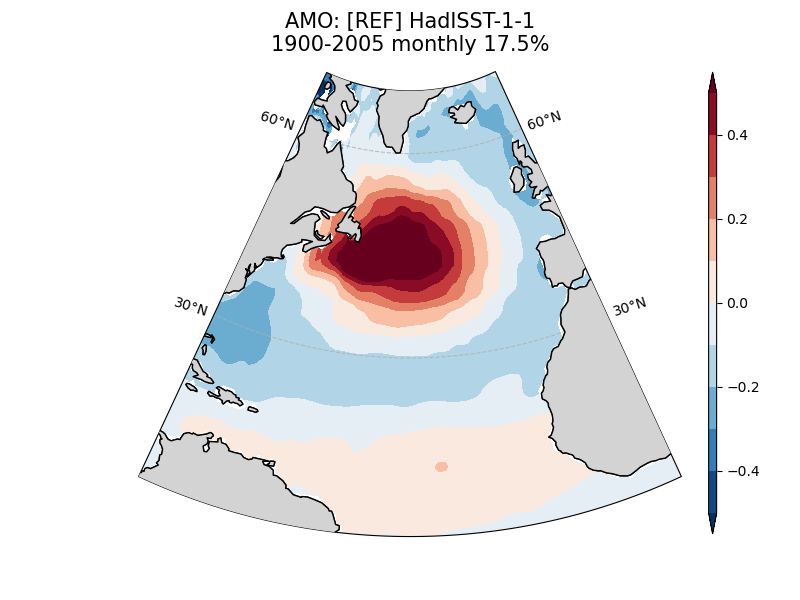

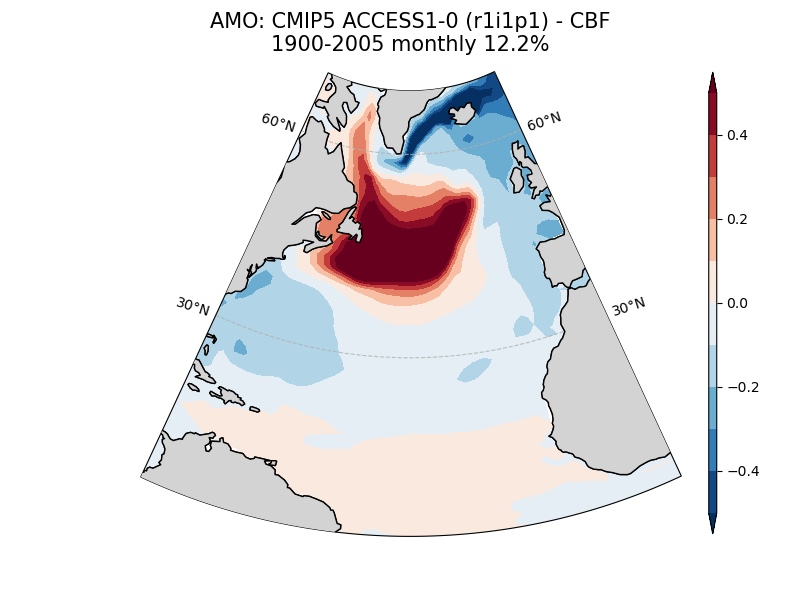

In [32]:
a = Image(image_path1)
b = Image(image_path2)
display_png(a, b)

### 3.3.3 AMO (yearly)

- Above default AMO calculation was done for monthly interval. To get smoothed result, below is repeating the AMO calculation but with yearly averaged.

In [33]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --variability_mode "AMO" --case_id "AMO_yearly" --msyear 1900 --meyear 2005 --seasons yearly

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: AMO
seasons: ['yearly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
parallel: False
demo_output/AMO_yearly
demo_output/AMO_yearly
demo_output/AMO_yearly
Estimate landmask
 -----  ACCESS1-0  ---------------------
 ---  r1i1p1  ---


/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/Users/lee1043/mambaforge/envs/pmp_devel_20231129/lib/python3.10/site-packages/numpy/ma/core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
INFO::2023-11-29 17:41::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/AMO_yearly/var_mode_AMO_EOF1_stat_cmip5_hist

In [34]:
# AMO (yearly) from the reference dataset (i.e., HadISST)
image_path1 = demo_output_directory + "/AMO_yearly/AMO_ts_EOF1_yearly_obs_1900-2005.png"

# AMO from the simulation, defined by the Common Basis Function
image_path2 = demo_output_directory + "/AMO_yearly/AMO_ts_EOF1_yearly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png"

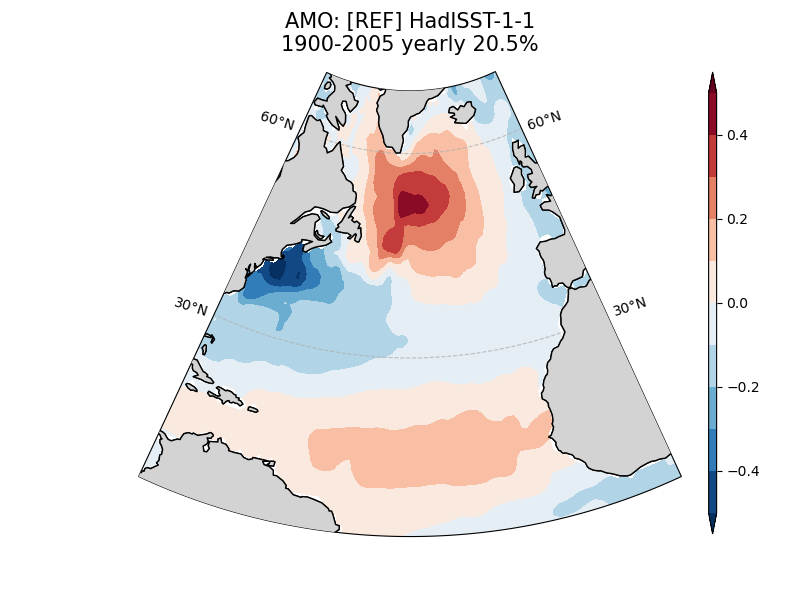

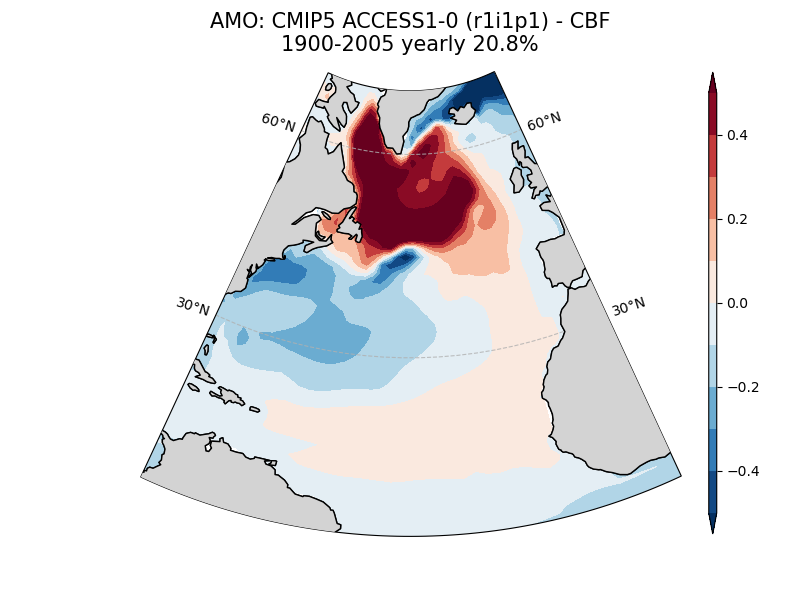

In [35]:
a = Image(image_path1)
b = Image(image_path2)
display_png(a, b)

### Compare PC time series from monthly and yearly AMO calculation

In [36]:
ncfilename = demo_output_directory + "/AMO/AMO_ts_EOF1_monthly_obs_1900-2005.nc"

In [37]:
ncfilename2 = demo_output_directory + "/AMO_yearly/AMO_ts_EOF1_yearly_obs_1900-2005.nc"

In [38]:
ds1 = xc.open_dataset(ncfilename)
ds2 = xc.open_dataset(ncfilename2)

In [39]:
date1 = [datetime.datetime(d.year, d.month, d.day) for d in ds1.time.values]
date2 = [datetime.datetime(d.year, d.month, d.day) for d in ds2.time.values]

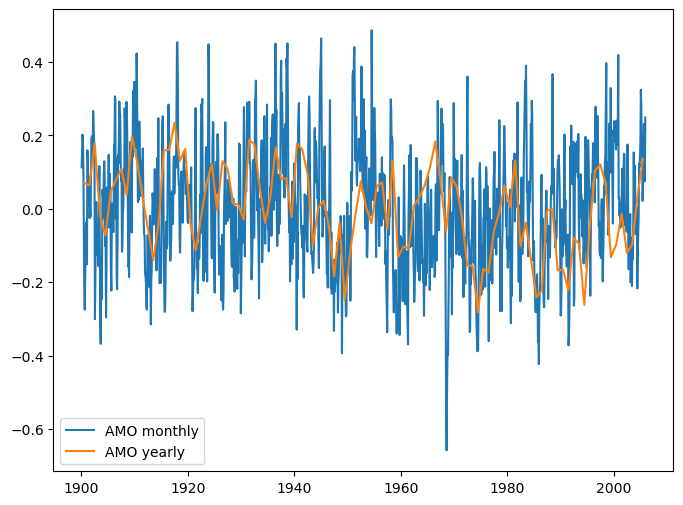

In [40]:
fig = plt.figure(figsize=(8, 6))

plt.plot(date1, ds1['pc'], label='AMO monthly')
plt.plot(date2, ds2['pc'], label='AMO yearly')
plt.legend()

### Compare PC time series of yearly AMO calculation from OBS and Model

* Note: In this example, the model AMO is calculated from Historical simulation where atmospher-ocean coupled model freely but forced by observational record of CO2 conentration, aerosol, volcanic impact, and solar irradiation. With that, model is not expected to reproduce day-to-day or year-to-year match to the observation.

In [41]:
ncfilename = demo_output_directory + "/AMO_yearly/AMO_ts_EOF1_yearly_obs_1900-2005.nc"

In [42]:
ncfilename2 = demo_output_directory + "/AMO_yearly/AMO_ts_EOF1_yearly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"

In [43]:
ds1 = xc.open_dataset(ncfilename)
ds2 = xc.open_dataset(ncfilename2)

In [44]:
date1 = [datetime.datetime(d.year, d.month, d.day) for d in ds1.time.values]
date2 = [datetime.datetime(d.year, d.month, d.day) for d in ds2.time.values]

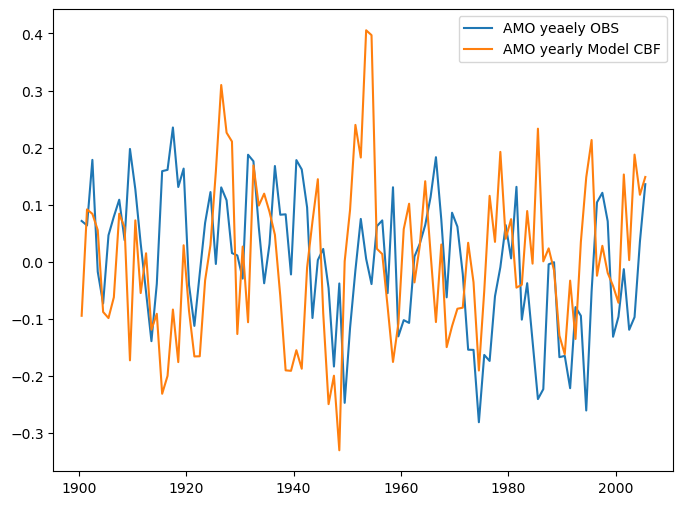

In [45]:
fig = plt.figure(figsize=(8, 6))

plt.plot(date1, ds1['pc'], label='AMO yeaely OBS')
plt.plot(date2, ds2['pc'], label='AMO yearly Model CBF')
plt.legend()